In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [32]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual CPI Value')
    plt.plot(predicted, color='blue',label='Predicted CPI Value')
    plt.title("Malaysia's CPI Value")
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    
def return_analysis(test,predicted):
    e=predicted-test
    mse_f = np.mean(e**2)
    mae_f = np.mean(abs(e))
    mape_f = np.mean(abs(e/predicted))*100
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(e**2)/sum((predicted-np.mean(predicted))**2))
    print("The root mean squared error is {}.".format(rmse_f))
    print("The mean absolute error is {}.".format(mae_f))
    print("The mean absolute percentage error is {}.".format(mape_f), "%")    

In [33]:
# Read in the weather data csv - keep only the columns we need
df=pd.read_csv('/Users/chamyingchyi/Desktop/Academic Purpose/FYP/Dataset/Cleaned_Data.csv', encoding='utf-8')
df1=df[["Date","CPI"]]
df2=df1[0:657]
print(df2)

       Date    CPI
0    Jan-68   23.4
1    Feb-68   23.3
2    Mar-68   23.3
3    Apr-68   23.2
4    May-68   23.0
..      ...    ...
652  May-22  126.6
653  Jun-22  127.4
654  Jul-22  127.9
655  Aug-22  128.2
656  Sep-22  128.3

[657 rows x 2 columns]


In [34]:
# Checking for missing values
training_set = df2.iloc[0:525,1:2].values
test_set =df2.iloc[525:657,1:2].values

print(training_set,test_set)

[[ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.2]
 [ 23. ]
 [ 22.8]
 [ 22.8]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.6]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 22.7]
 [ 23. ]
 [ 23. ]
 [ 23.2]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.3]
 [ 23.4]
 [ 23.3]
 [ 23.4]
 [ 23.4]
 [ 23.5]
 [ 23.5]
 [ 23.9]
 [ 24. ]
 [ 23.8]
 [ 23.6]
 [ 23.5]
 [ 23.5]
 [ 23.4]
 [ 23.5]
 [ 23.6]
 [ 23.9]
 [ 24. ]
 [ 24.2]
 [ 24.3]
 [ 24.3]
 [ 24.3]
 [ 24.4]
 [ 24.3]
 [ 24.4]
 [ 24.5]
 [ 24.5]
 [ 24.6]
 [ 24.6]
 [ 24.7]
 [ 25. ]
 [ 25.3]
 [ 25.5]
 [ 25.5]
 [ 25.8]
 [ 26.4]
 [ 26.7]
 [ 27.2]
 [ 27.5]
 [ 28.1]
 [ 28.5]
 [ 29.2]
 [ 29.6]
 [ 29.9]
 [ 30.9]
 [ 31.5]
 [ 31.2]
 [ 31.5]
 [ 31.7]
 [ 31.9]
 [ 32.2]
 [ 32.3]
 [ 32.5]
 [ 32.9]
 [ 33.2]
 [ 33.4]
 [ 33.5]
 [ 33.1]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33. ]
 [ 33.2]
 [ 33.4]
 [ 33.3]
 [ 33. ]
 [ 33.5]
 [ 33.9]
 [ 33.6]
 [ 33.7]
 [ 33.6]
 [ 33.7]
 [ 34.1]
 [ 34.1]
 [ 34.2]
 [ 34.3]
 [ 34.3]
 [ 34.3]
 [ 34.8]
 [ 35.3]
 [ 35.3]
 [ 35.3]
 

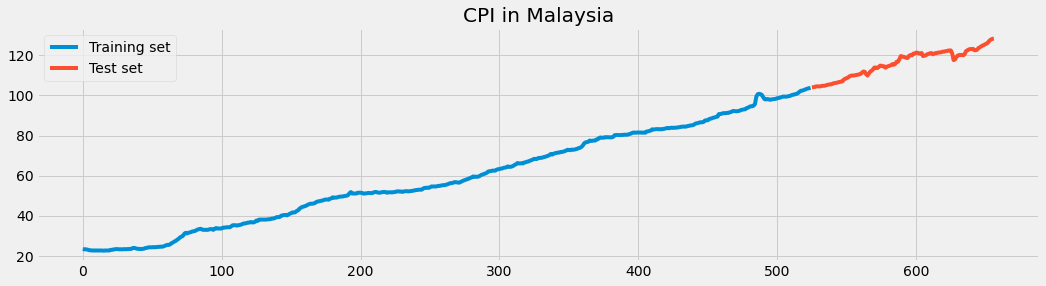

In [35]:
df2.iloc[0:525,1].plot(figsize=(16,4),legend=True)
df2.iloc[525:657,1].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('CPI in Malaysia')
plt.show()

In [36]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [53]:
# Since GRU store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,525):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train


array([[0.00985222, 0.00862069, 0.00862069, ..., 0.02463054, 0.02586207,
        0.02955665],
       [0.00862069, 0.00862069, 0.00738916, ..., 0.02586207, 0.02955665,
        0.03325123],
       [0.00862069, 0.00738916, 0.00492611, ..., 0.02955665, 0.03325123,
        0.03571429],
       ...,
       [0.84482759, 0.84359606, 0.84605911, ..., 0.98522167, 0.98891626,
        0.99261084],
       [0.84359606, 0.84605911, 0.84605911, ..., 0.98891626, 0.99261084,
        0.99507389],
       [0.84605911, 0.84605911, 0.84975369, ..., 0.99261084, 0.99507389,
        0.99753695]])

In [54]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [47]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


8/8 [==============================] - 9s 191ms/step - loss: 0.5486
Epoch 2/100
8/8 [==============================] - 1s 158ms/step - loss: 0.2390
Epoch 3/100
8/8 [==============================] - 1s 156ms/step - loss: 0.1643
Epoch 4/100
8/8 [==============================] - 1s 148ms/step - loss: 0.1056
Epoch 5/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0910
Epoch 6/100
8/8 [==============================] - 1s 146ms/step - loss: 0.0843
Epoch 7/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0813
Epoch 8/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0785
Epoch 9/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0828
Epoch 10/100
8/8 [==============================] - 1s 141ms/step - loss: 0.0769
Epoch 11/100
8/8 [==============================] - 1s 145ms/step - loss: 0.0797
Epoch 12/100
8/8 [==============================] - 1s 145ms/step - loss: 0.0728
Epoch 13/100
8/8 [==============================]

In [40]:
print(regressorGRU.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f97a7ef8d60>>


In [55]:
dataset_total = pd.concat((df2.iloc[0:525,1:2],df2.iloc[525:657,1:2]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [60]:
X_test = []
for i in range(60,192):
    X_test.append(inputs[i-60:i,0])
print(len(X_test))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted = regressorGRU.predict(X_test)
GRU_predicted = sc.inverse_transform(GRU_predicted)

132


In [50]:
print(GRU_predicted)

[[101.78371 ]
 [101.984505]
 [102.17887 ]
 [102.36451 ]
 [102.5422  ]
 [102.710846]
 [102.86819 ]
 [103.012   ]
 [103.14322 ]
 [103.26361 ]
 [103.37369 ]
 [103.47576 ]
 [103.57313 ]
 [103.66911 ]
 [103.76519 ]
 [103.860245]
 [103.95696 ]
 [104.05767 ]
 [104.162476]
 [104.27002 ]
 [104.38092 ]
 [104.4946  ]
 [104.610725]
 [104.7281  ]
 [104.85484 ]
 [104.997375]
 [105.15758 ]
 [105.33416 ]
 [105.52791 ]
 [105.73718 ]
 [105.95623 ]
 [106.176544]
 [106.39093 ]
 [106.59554 ]
 [106.78808 ]
 [106.96848 ]
 [107.13809 ]
 [107.30356 ]
 [107.47363 ]
 [107.64807 ]
 [107.808205]
 [107.93397 ]
 [108.02997 ]
 [108.11573 ]
 [108.20728 ]
 [108.31793 ]
 [108.459595]
 [108.63092 ]
 [108.81889 ]
 [109.015945]
 [109.222176]
 [109.433556]
 [109.639915]
 [109.83281 ]
 [109.999176]
 [110.138885]
 [110.2583  ]
 [110.36452 ]
 [110.4647  ]
 [110.567215]
 [110.67085 ]
 [110.77655 ]
 [110.89525 ]
 [111.02931 ]
 [111.1889  ]
 [111.38972 ]
 [111.628   ]
 [111.88791 ]
 [112.15055 ]
 [112.39831 ]
 [112.62075 ]
 [112.

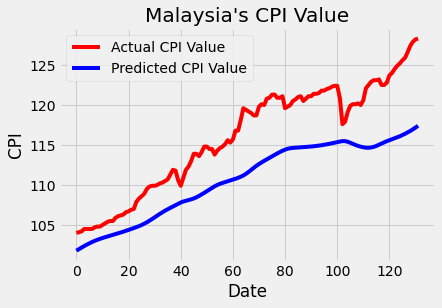

In [51]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted)

In [52]:
# Evaluating GRU
return_analysis(test_set,GRU_predicted)


The root mean squared error is 5.85415298674836.
The mean absolute error is 5.356487019856771.
The mean absolute percentage error is 4.771658939314582. %
